In [25]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input
import random


In [26]:
np.random.seed(0)

In [27]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
'''
this function imports 60,000 images to
training and 10,000 testing images
'''

'\nthis function imports 60,000 images to\ntraining and 10,000 testing images\n'

In [28]:
print(X_train.shape)
print(X_test.shape)


'''
this 28*28 is the image pexels
'''

(60000, 28, 28)
(10000, 28, 28)


'\nthis 28*28 is the image pexels\n'

In [29]:
assert(X_train.shape[0]==Y_train.shape[0]), "Traning images does not equal Traning labels "
assert(X_test.shape[0] == Y_test.shape[0]), "Testing images does not equal Testing labels "
assert(X_train.shape[1:] == (28,28) ), "Trainign Photo doesnt have suffecient pexels  "
assert(X_test.shape[1:] == (28,28) ), "Tesing Photo doesnt have suffecient pexels"


'''
this function is used for giving an error if the condition wasnt satisfied
in order to not prcoeed in the neural netwrok with wrong data
'''

'\nthis function is used for giving an error if the condition wasnt satisfied\nin order to not prcoeed in the neural netwrok with wrong data \n'

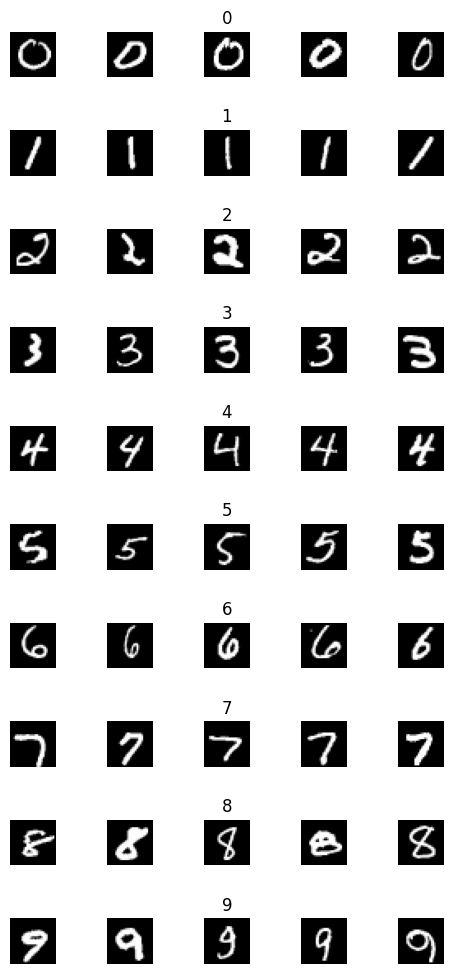

In [30]:
rows = 10
cols = 5

no_samples = []

fig , axs = plt.subplots(rows, cols, figsize =  (5,10) )
fig.tight_layout()

for i in range(rows):
  for j in range(cols):
    X_selected = X_train[Y_train==i ,: ,: ]
    axs[i][j].imshow(X_selected[random.randint(0, len(X_selected)-1), :, :], cmap = plt.get_cmap("gray"))
    axs[i][j].axis("off")

    if j == 2:
      axs[i][j].set_title(str(i))
      no_samples.append(len(X_selected))

In [31]:
print(no_samples)

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

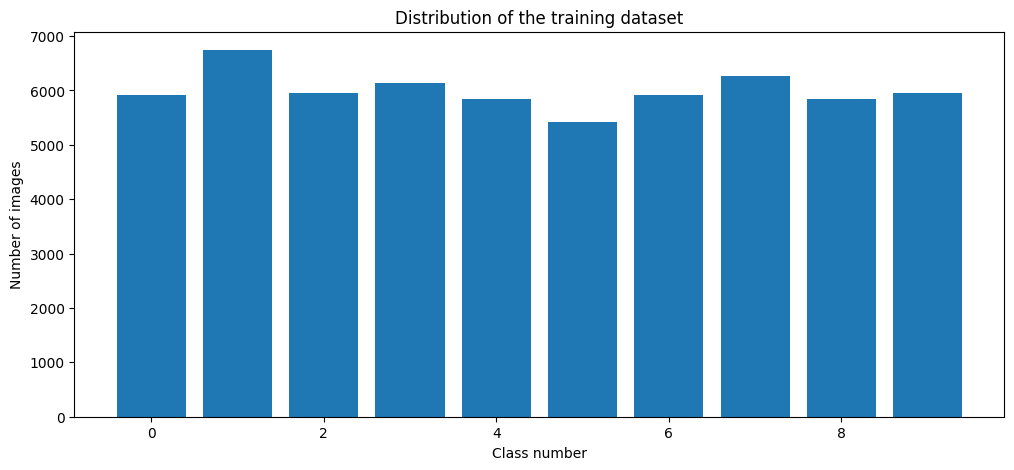

In [32]:
plt.figure(figsize = (12,5))
plt.bar(range(0, rows), no_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [33]:
Y_train = to_categorical(Y_train , rows)
Y_test = to_categorical(Y_test , rows)

'Normalization'

X_train = X_train/ 255
X_test = X_test  /   255


'''
Don't run this cell again !!!!
'''


"\nDon't run this cell again !!!!\n"

In [34]:
X_train = X_train.reshape(X_train.shape[0], (X_train.shape[1]*X_train.shape[2]))
print(X_train.shape)

(60000, 784)


In [35]:
X_test = X_test.reshape(X_test.shape[0], (X_test.shape[1]*X_test.shape[2]))
print(X_test.shape)

(10000, 784)


Implementing Deep Neural network

In [36]:
model = Sequential()
model.add( Input(shape= (784, )))
model.add( Dense( units = 10, activation="relu" ) )
model.add( Dense( units = 15, activation="relu" ) )
model.add( Dense( units = 10, activation="relu" ) )
model.add( Dense( units = rows, activation="softmax" ) )
model.compile(Adam(learning_rate=.01), loss = "categorical_crossentropy", metrics =["accuracy"])




In [37]:
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 10)                  │           7,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 15)                  │             165 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,285 (32.36 KB)

 Trainable params: 8,285 (32.36 KB)

 Non-trainable params: 0 (0.00 B)

None


In [38]:
h= model.fit(X_train, Y_train, validation_split = .1 ,batch_size= 200, epochs = 7, verbose =1, shuffle= "true" )

Epoch 1/7
270/270 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6932 - loss: 0.9417 - val_accuracy: 0.9202 - val_loss: 0.2890
Epoch 2/7
270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9040 - loss: 0.3346 - val_accuracy: 0.9278 - val_loss: 0.2567
Epoch 3/7
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9180 - loss: 0.2893 - val_accuracy: 0.9327 - val_loss: 0.2289
Epoch 4/7
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9265 - loss: 0.2537 - val_accuracy: 0.9447 - val_loss: 0.2007
Epoch 5/7
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9312 - loss: 0.2379 - val_accuracy: 0.9427 - val_loss: 0.2105
Epoch 6/7
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9337 - loss: 0.2370 - val_accuracy: 0.9400 - val_loss: 0.2223
Epoch 7/7
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9344 - loss: 0.2242 - val_accuracy: 0.9415 - val_loss: 0.2148


Text(0.5, 0, 'epoch')

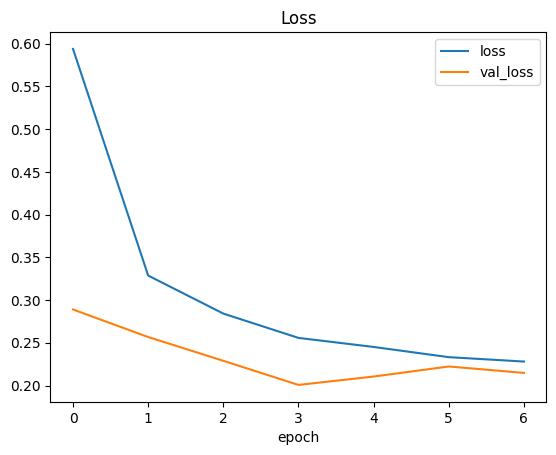

In [39]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')


Text(0.5, 0, 'epoch')

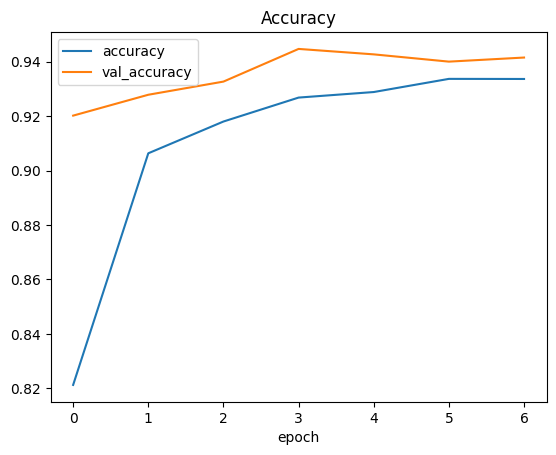

In [40]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [41]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
Test score: 0.2611444294452667
Test accuracy: 0.9264000058174133


In [50]:
import requests
from PIL import Image
import cv2

<Response [200]>
(131, 130, 3)
(28, 28)


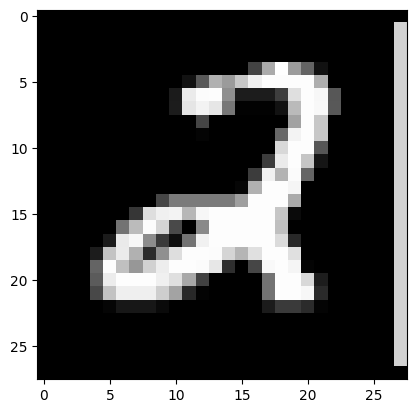

In [59]:
url = "https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png"

response = requests.get(url, stream = True)
print(response)
img = Image.open(response.raw)
arr_img = np.asarray(img)
print(arr_img.shape)
arr_img = cv2.bitwise_not(arr_img)
arr_img = cv2.resize(arr_img, (28,28))
arr_img = cv2.cvtColor(arr_img, cv2.COLOR_BGR2GRAY)
print(arr_img.shape)
plt.imshow(arr_img, cmap= plt.get_cmap("gray"))


In [64]:
arr_img= arr_img.reshape(1, 28*28)
print(arr_img.shape)
arr_img = arr_img/255

(1, 784)


In [66]:
predcition = np.argmax(model.predict(arr_img))
print("prediction of the neural netwrok is :", predcition)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
prediction of the neural netwrok is : 2
